    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [8]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
f,\\ \hline
Гц & 17 & 19 & 22 & 25.7 & 31 & 39.5 & 53 & 78.2\\ \hline
R,\\ \hline
10^5\\ \hline
Ом & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2
\\ \hline



    Теперь основная часть:

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from math import log as ln

In [10]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [13]:
U1 = list (map (float, input("U1: ").split()))
I1 = list (map (float, input("I1: ").split()))
U2 = list (map (float, input("U2: ").split()))
I2 = list (map (float, input("I2: ").split()))

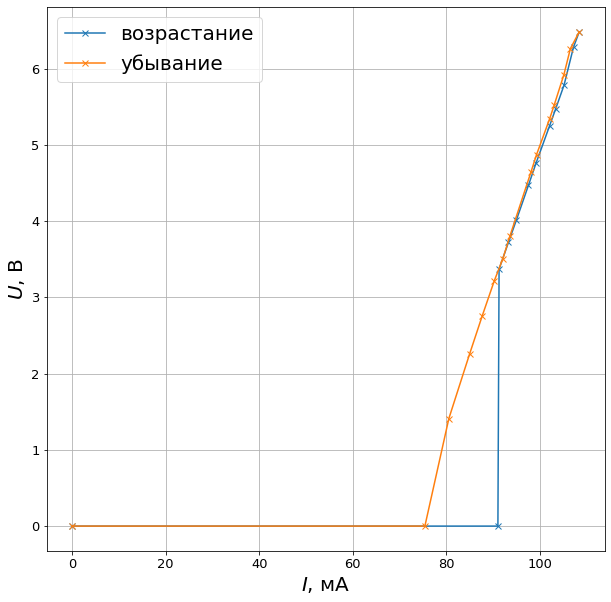

In [22]:
plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.plot ([0] + U1, [0] + I1, marker = 'x', label = "возрастание")
ax.plot (U2 + [0], I2 + [0], marker = 'x', label = "убывание")

ax.set_xlabel('$I$, мА', fontsize = 20)
ax.set_ylabel('$U$, В',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/V_A.pdf")

In [20]:
r = 5.4
U3 = [U1[i] - r * I1[i] for i in range (len (U1))]

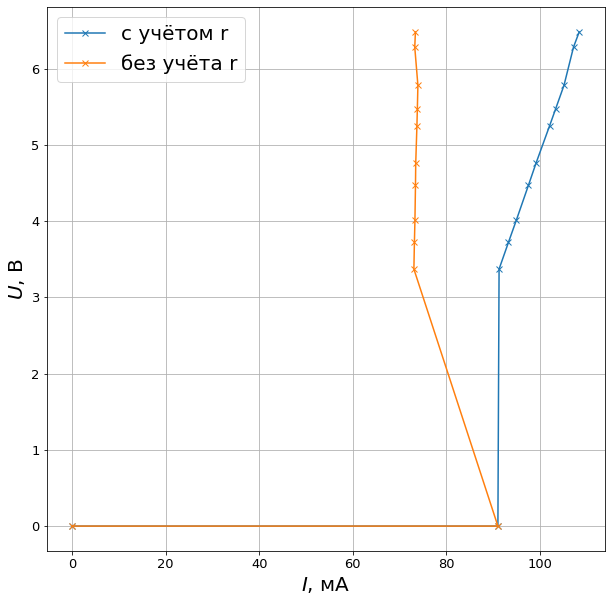

In [23]:
plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.plot ([0] + U1, [0] + I1, marker = 'x', label = "с учётом r")
ax.plot ([0] + U3, [0] + I1, marker = 'x', label = "без учёта r")

ax.set_xlabel('$I$, мА', fontsize = 20)
ax.set_ylabel('$U$, В',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/V_A_r.pdf")

In [26]:
f_C = list (map (float, input("f_C: ").split()))
C   = list (map (float, input("C: ").split()))

T_Cexp = [1 / i_f_C for i_f_C in f_C]

R_const = 0.52 # МОм
U  = 110
V1 = 91.25
V2 = 80.52
T_Cth = [R_const * C[i] * ln ((U - V2) / (U - V1)) for i in range (len (C))]

In [28]:
f_R = list (map (float, input("f_R: ").split()))
R   = list (map (float, input("R: ").split()))

T_Rexp = [1 / i_f_R for i_f_R in f_R]

C_const = 5e-3 # 10^-5 Ф
T_Rth = [C_const * R[i] * ln ((U - V2) / (U - V1)) for i in range (len (R))]

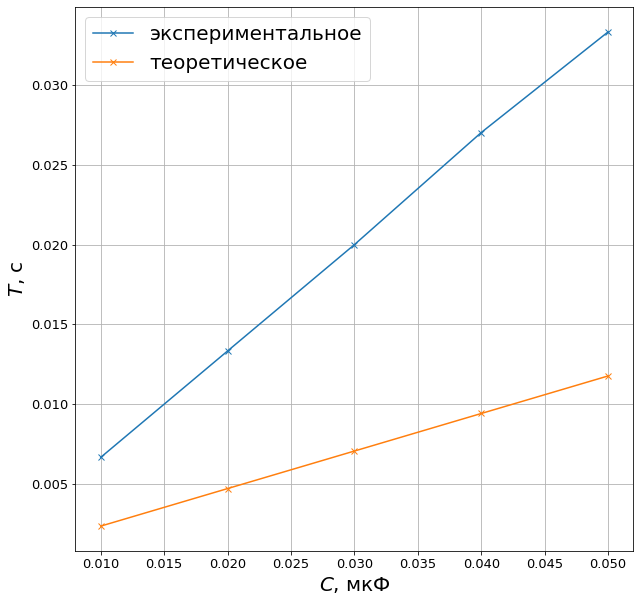

In [30]:
plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.plot (C, T_Cexp, marker = 'x', label = "экспериментальное")
ax.plot (C, T_Cth, marker = 'x', label = "теоретическое")

ax.set_xlabel('$C$, мкФ', fontsize = 20)
ax.set_ylabel('$T$, с',   fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/T_C.pdf")

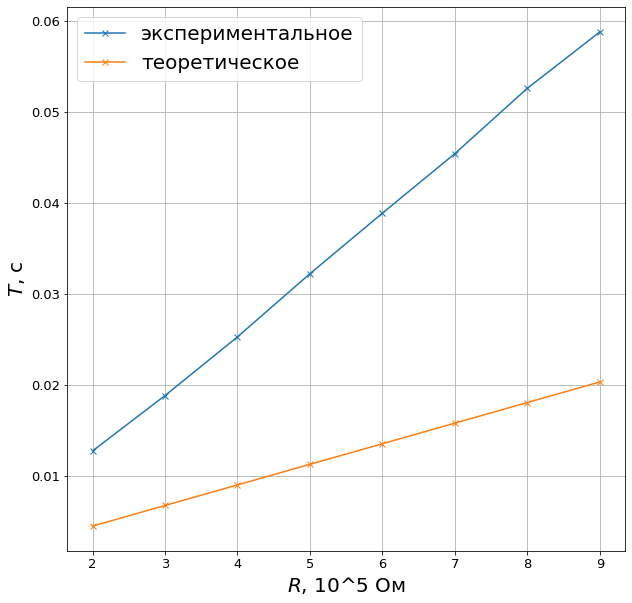

In [31]:
plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.plot (R, T_Rexp, marker = 'x', label = "экспериментальное")
ax.plot (R, T_Rth, marker = 'x', label = "теоретическое")

ax.set_xlabel('$R$, 10^5 Ом', fontsize = 20)
ax.set_ylabel('$T$, с',   fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/T_R.pdf")